# Creating GHZ states

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import time
import datetime

from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

In [2]:
ghz_2 = Circuit().h(0).cnot(0, 1)
ghz_4 = Circuit().h(0).cnot(0, 1).cnot(0, 2).cnot(0, 3)
ghz_6 = Circuit().h(0).cnot(0, 1).cnot(0, 2).cnot(0, 3).cnot(0, 4).cnot(0, 5)
ghz_8 = Circuit().h(0).cnot(0, 1).cnot(0, 2).cnot(0, 3).cnot(0, 4).cnot(0, 5).cnot(0, 6).cnot(0, 7)

## Simulator

In [11]:
device = LocalSimulator()
counts_2 = device.run(ghz_2, shots=100).result().measurement_counts
counts_4 = device.run(ghz_4, shots=500).result().measurement_counts
counts_6 = device.run(ghz_6, shots=1000).result().measurement_counts
counts_8 = device.run(ghz_8, shots=5000).result().measurement_counts
print(counts_2)
print(counts_4)
print(counts_6)
print(counts_8)

Counter({'11': 52, '00': 48})
Counter({'0000': 259, '1111': 241})
Counter({'111111': 505, '000000': 495})
Counter({'11111111': 2520, '00000000': 2480})


## Hardware

In [5]:
now = datetime.datetime.now().strftime('%y%m%d%H%M%S')
my_bucket = "amazon-braket-hardware-testing" # the name of the bucket
my_prefix = "rigetti-A11-ghz-" + now # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

# device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
device = AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
# device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")

In [ ]:
counts_hw2 = device.run(ghz_2, s3_folder, shots=100).result().measurement_counts
counts_hw4 = device.run(ghz_4, s3_folder, shots=500).result().measurement_counts
counts_hw6 = device.run(ghz_6, s3_folder, shots=1000).result().measurement_counts
counts_hw8 = device.run(ghz_8, s3_folder, shots=5000).result().measurement_counts

## See results

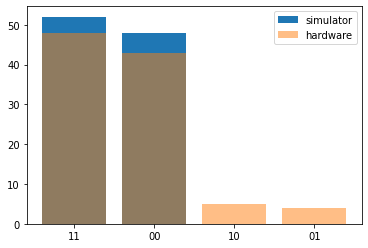

In [18]:
plt.bar(counts_2.keys(), counts_2.values())
plt.bar(counts_hw2.keys(), counts_hw2.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

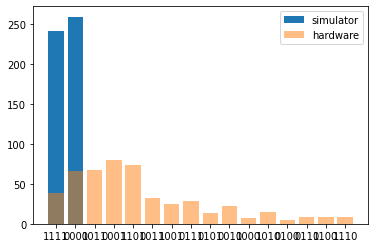

In [19]:
plt.bar(counts_4.keys(), counts_4.values())
plt.bar(counts_hw4.keys(), counts_hw4.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

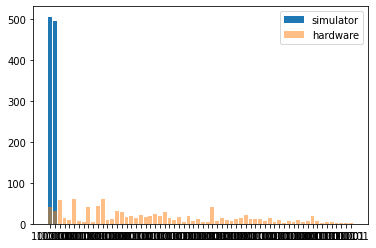

In [20]:
plt.bar(counts_6.keys(), counts_6.values())
plt.bar(counts_hw6.keys(), counts_hw6.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

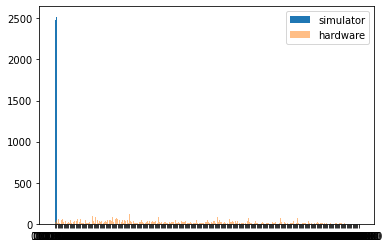

In [21]:
plt.bar(counts_8.keys(), counts_8.values())
plt.bar(counts_hw8.keys(), counts_hw8.values(), alpha=0.5)
plt.legend(['simulator','hardware'])